In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [2]:
mpsa_data_df = pd.read_csv("mpsa_data.csv")

In [3]:
mpsa_data_df.head()

,tot_ct,ex_ct,psi,log10_psi,splice_site
0,28,2,1.055374,0.023406,GGAGUGAUG
1,315,7,0.258277,-0.587914,AGUGUGCAA
2,193,15,0.841398,-0.074999,UUCGCGCCA
3,27,0,0.364355,-0.438475,UAAGCUUUU
4,130,2,0.233632,-0.631467,AUGGUCGGG


In [4]:
brca2_mutations: list = [mutation.strip() for mutation in open(Path("brca2_mutations.txt")).readlines()]

In [5]:
def splice_site_coordinate_conversion(splice_site_index: int) -> int:
    """Convert splice site coordinates into 0-based indexing"""
    if splice_site_index < -3 or splice_site_index > 6:
        return None
    elif splice_site_index == -3:
        return 0
    else:
        return splice_site_index + 2

In [6]:
def get_decile_index(psi, minimum=0, bin_width=10) -> int:
    """Returns the decile  for measurements scaled 0 to 100. PSI of
    >= 100 is assigned the last decile."""
    index = int((psi - minimum) // bin_width)
    if index > 9:
        return 9
    else:
        return index

In [7]:
psi_values = mpsa_data_df["psi"].to_list()

In [8]:
psi_values[0]

1.0553741235231964

In [9]:
decile_indices: list = [get_decile_index(psi) for psi in psi_values]

In [10]:
len(psi_values)

30483

In [11]:
max(psi_values)

199.2780872794801

In [12]:
max(decile_indices)

9

In [13]:
from collections import Counter

In [14]:
decile_indices_counter: dict = dict(Counter(decile_indices))

In [15]:
dict(sorted(decile_indices_counter.items()))

{0: 28992, 1: 235, 2: 131, 3: 103, 4: 86, 5: 83, 6: 94, 7: 112, 8: 139, 9: 508}

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

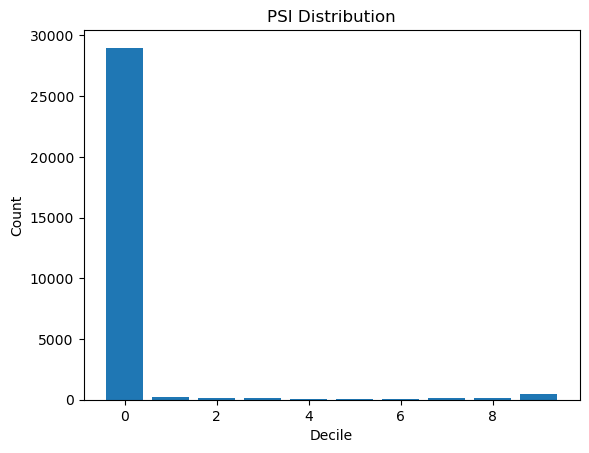

In [17]:
plt.bar(decile_indices_counter.keys(), decile_indices_counter.values())
plt.title("PSI Distribution")
plt.xlabel("Decile")
plt.ylabel("Count")

In [18]:
mpsa_data_df.head()

,tot_ct,ex_ct,psi,log10_psi,splice_site
0,28,2,1.055374,0.023406,GGAGUGAUG
1,315,7,0.258277,-0.587914,AGUGUGCAA
2,193,15,0.841398,-0.074999,UUCGCGCCA
3,27,0,0.364355,-0.438475,UAAGCUUUU
4,130,2,0.233632,-0.631467,AUGGUCGGG


In [45]:
len(mpsa_data_df["splice_site"])

30483

In [46]:
len(mpsa_data_dict.keys())

30483

In [43]:
mpsa_data_dict: dict = dict(zip(mpsa_data_df["splice_site"], mpsa_data_df["psi"]))

In [47]:
gc_splice_site_psi: dict = {}
for splice_site, psi in mpsa_data_dict.items():
    position_one: int = splice_site_coordinate_conversion(1)
    position_two: int = splice_site_coordinate_conversion(2)
    if splice_site[position_one:position_two + 1] == "GC":
        gc_splice_site_psi[splice_site] = psi
    else:
        continue

In [48]:
len(gc_splice_site_psi.keys())

15414

In [49]:
gc_splice_site_psi_values: list = list(gc_splice_site_psi.values())

In [55]:
top_decile_gc_splice_site_sequences: list = []
for splice_site, psi in gc_splice_site_psi.items():
    decile_index: int = get_decile_index(psi)
    if decile_index == 9:
        top_decile_gc_splice_site_sequences.append(splice_site)
    else:
        continue

In [56]:
top_decile_gc_splice_site_sequences

['GGUGCGUAC',
 'GGUGCGUAA',
 'GGUGCGUGU',
 'GGUGCGUGC',
 'AAGGCAAGU',
 'ACGGCAAGU',
 'GGUGCGGAU',
 'GGUGCGUUG',
 'GGUGCGUGA',
 'CAGGCAAGU',
 'GGUGCGUUA',
 'GGUGCGUAU',
 'GGUGCGUCA',
 'GGUGCGUUC',
 'GGUGCGUCU',
 'GGUGCGCGC',
 'CAGGCGAGU',
 'GAGGCAAGU',
 'CGUGCGUAC',
 'GGUGCGGUA']

In [57]:
len(top_decile_gc_splice_site_sequences)

20

In [59]:
gc_have_gg_counter: int = 0
for sequence in top_decile_gc_splice_site_sequences:
    position_one: int = splice_site_coordinate_conversion(-1)
    position_two: int = splice_site_coordinate_conversion(+5)
    if sequence[position_one] == 'G' and sequence[position_two] == 'G':
        gc_have_gg_counter += 1
    else:
        continue
print(f"Fraction of top decile GC sequences that have G's at both -1 & +5 positions: {round(float(gc_have_gg_counter / len(top_decile_gc_splice_site_sequences)), 4)}")

Fraction of top decile GC sequences that have G's at both -1 & +5 positions: 0.2


In [50]:
gc_splice_site_decile_indices: list = [get_decile_index(psi) for psi in gc_splice_site_psi_values]

In [51]:
gc_splice_decile_indices_counter: dict = dict(Counter(gc_splice_site_decile_indices))

In [52]:
dict(sorted(gc_splice_decile_indices_counter.items()))

{0: 15291, 1: 25, 2: 11, 3: 12, 4: 15, 5: 13, 6: 13, 7: 7, 8: 7, 9: 20}

Text(0, 0.5, 'Count')

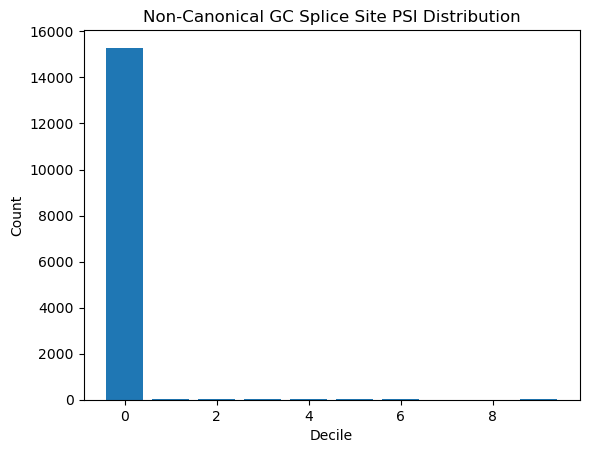

In [54]:
plt.bar(gc_splice_decile_indices_counter.keys(), gc_splice_decile_indices_counter.values())
plt.title("Non-Canonical GC Splice Site PSI Distribution")
plt.xlabel("Decile")
plt.ylabel("Count")

In [37]:
brca2_filtered_mutations_df = mpsa_data_df[mpsa_data_df["splice_site"].isin(brca2_mutations)]

In [38]:
brca2_psi_values = brca2_filtered_mutations_df["psi"].to_list()

In [39]:
brca2_decile_indices: list = [get_decile_index(psi) for psi in brca2_psi_values]

In [40]:
brca2_decile_indices_counter: dict = dict(Counter(brca2_decile_indices))

In [41]:
dict(sorted(brca2_decile_indices_counter.items()))

{0: 21, 1: 2, 2: 1, 3: 3, 4: 2, 6: 1, 7: 1, 8: 3, 9: 7}

Text(0, 0.5, 'Count')

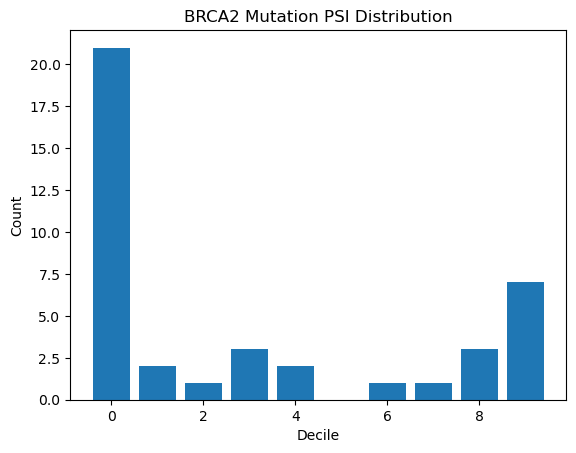

In [42]:
plt.bar(brca2_decile_indices_counter.keys(), brca2_decile_indices_counter.values())
plt.title("BRCA2 Mutation PSI Distribution")
plt.xlabel("Decile")
plt.ylabel("Count")